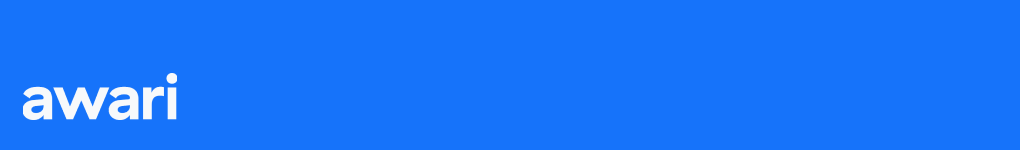



---

# Instalando bibliotecas

In [ ]:
!pip install pandas
!pip install pymongo
!pip install boto3


# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
from io import BytesIO
from pymongo import MongoClient
import boto3
from io import StringIO 
import os

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType 
from pyspark.sql.types import ArrayType, DoubleType, BooleanType
from pyspark.sql.functions import col,array_contains

# Inicio tarefa

O que fazer?

Novamente, com base nos arquivos de Municípios e Estados, já utilizados nas tarefas anteriores, e com base no uso do Spark, visto em aula, as atividades aqui, a partir do no wokspace em Docker, são:

1. Importar CSVs da pasta /exercicios/municipios-estados/csv/ e salvar como arquivos JSON no MinIO.
2. Importar JSONs da pasta de /exercicios/municipios-estados/csv/ e salvar como arquivos CSV no MinIO.
3. Importar CSVs da pasta de /exercicios/municipios-estados/csv/ e salvar como arquivo .parquet no MinIO.
4. Importar CSVs da pasta de /exercicios/municipios-estados/csv/ para tabelas no banco de dados PostgreSQL (awari-postgresql-db).
5. Visualizar os dados no PostgreSQL usando awari-pg-admin.

# Conexão Minio
Cliente para conectar o Minio


In [2]:
{"url":"http://127.0.0.1:9000",
 "accessKey":"jRpLQlPQKkYKkX8x",
 "secretKey":"UaS2qIpp1eQg6l90qZI9qD9d537X86R1",
 "api":"s3v4","path":"auto"}

{'url': 'http://127.0.0.1:9000',
 'accessKey': 'jRpLQlPQKkYKkX8x',
 'secretKey': 'UaS2qIpp1eQg6l90qZI9qD9d537X86R1',
 'api': 's3v4',
 'path': 'auto'}

In [3]:
client = boto3.client('s3', 
    endpoint_url='http://awari-minio-nginx:9000',
    aws_access_key_id='jRpLQlPQKkYKkX8x',
    aws_secret_access_key='UaS2qIpp1eQg6l90qZI9qD9d537X86R1',
    aws_session_token=None,
    config=boto3.session.Config(signature_version='s3v4'),
    verify=False,
    region_name='sa-east-1'
)

## 1. Salvando como JSON

In [4]:
estados = pd.read_csv('./exercicios/municipios-estados/csv/estados.csv')
municipios = pd.read_csv('./exercicios/municipios-estados/csv/municipios.csv')

In [5]:
buffer = StringIO()
estados.to_json(buffer)
client.put_object(Body=buffer.getvalue(), Bucket='tarefaaula08', Key='estados.json')

{'ResponseMetadata': {'RequestId': '175BD04FC3C14E30',
  'HostId': 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'nginx/1.19.2',
   'date': 'Thu, 04 May 2023 02:38:46 GMT',
   'content-length': '0',
   'connection': 'keep-alive',
   'accept-ranges': 'bytes',
   'content-security-policy': 'block-all-mixed-content',
   'etag': '"110b931e71b2ce063f46e19df0e56825"',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'vary': 'Origin, Accept-Encoding',
   'x-amz-bucket-region': 'sa-east-1',
   'x-amz-id-2': 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855',
   'x-amz-request-id': '175BD04FC3C14E30',
   'x-content-type-options': 'nosniff',
   'x-xss-protection': '1; mode=block'},
  'RetryAttempts': 0},
 'ETag': '"110b931e71b2ce063f46e19df0e56825"'}

In [6]:
buffer = StringIO()
municipios.to_json(buffer)
client.put_object(Body=buffer.getvalue(), Bucket='tarefaaula08', Key='municipios.json')

{'ResponseMetadata': {'RequestId': '175BD04FD2AF8614',
  'HostId': 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'nginx/1.19.2',
   'date': 'Thu, 04 May 2023 02:38:47 GMT',
   'content-length': '0',
   'connection': 'keep-alive',
   'accept-ranges': 'bytes',
   'content-security-policy': 'block-all-mixed-content',
   'etag': '"0f2e834ad4b7d430667626b533beca04"',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'vary': 'Origin, Accept-Encoding',
   'x-amz-bucket-region': 'sa-east-1',
   'x-amz-id-2': 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855',
   'x-amz-request-id': '175BD04FD2AF8614',
   'x-content-type-options': 'nosniff',
   'x-xss-protection': '1; mode=block'},
  'RetryAttempts': 0},
 'ETag': '"0f2e834ad4b7d430667626b533beca04"'}

# 2. Lendo Json e salvando como CSV

### Comentário: como nao existia um json na pasta, eu puxei o json criado do MinIO

In [7]:
obj = client.get_object(
        Bucket='tarefaaula08', 
        Key=f'estados.json'
    ).get("Body")

json_estados = pd.read_json(obj)

obj = client.get_object(
        Bucket='tarefaaula08', 
        Key=f'municipios.json'
    ).get("Body")

json_municipios = pd.read_json(obj)

In [8]:
# json_estados

In [9]:
buffer = StringIO()
json_estados.to_csv(buffer)
client.put_object(Body=buffer.getvalue(), Bucket='tarefaaula08', Key='estados.csv')

{'ResponseMetadata': {'RequestId': '175BD04FEFB1C600',
  'HostId': 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'nginx/1.19.2',
   'date': 'Thu, 04 May 2023 02:38:47 GMT',
   'content-length': '0',
   'connection': 'keep-alive',
   'accept-ranges': 'bytes',
   'content-security-policy': 'block-all-mixed-content',
   'etag': '"e6d02c1736ff43a9031d31964807a8f5"',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'vary': 'Origin, Accept-Encoding',
   'x-amz-bucket-region': 'sa-east-1',
   'x-amz-id-2': 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855',
   'x-amz-request-id': '175BD04FEFB1C600',
   'x-content-type-options': 'nosniff',
   'x-xss-protection': '1; mode=block'},
  'RetryAttempts': 0},
 'ETag': '"e6d02c1736ff43a9031d31964807a8f5"'}

In [10]:
buffer = StringIO()
json_municipios.to_csv(buffer)
client.put_object(Body=buffer.getvalue(), Bucket='tarefaaula08', Key='municipios.csv')

{'ResponseMetadata': {'RequestId': '175BD05005A9967C',
  'HostId': 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'nginx/1.19.2',
   'date': 'Thu, 04 May 2023 02:38:48 GMT',
   'content-length': '0',
   'connection': 'keep-alive',
   'accept-ranges': 'bytes',
   'content-security-policy': 'block-all-mixed-content',
   'etag': '"c3dec687ecc485af0ab5b0ae95470d56"',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'vary': 'Origin, Accept-Encoding',
   'x-amz-bucket-region': 'sa-east-1',
   'x-amz-id-2': 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855',
   'x-amz-request-id': '175BD05005A9967C',
   'x-content-type-options': 'nosniff',
   'x-xss-protection': '1; mode=block'},
  'RetryAttempts': 0},
 'ETag': '"c3dec687ecc485af0ab5b0ae95470d56"'}

# 3. Lendo CSV e salvando como PARQUET

In [15]:
estados = pd.read_csv('./exercicios/municipios-estados/csv/estados.csv')
municipios = pd.read_csv('./exercicios/municipios-estados/csv/municipios.csv')
buffer = BytesIO()
estados.to_parquet(buffer)
client.put_object(Body=buffer.getvalue(), Bucket='tarefaaula08', Key='estados_parquet')

buffer = BytesIO()
municipios.to_parquet(buffer)
client.put_object(Body=buffer.getvalue(), Bucket='tarefaaula08', Key='municipios_parquet')

{'ResponseMetadata': {'RequestId': '175BD052C6224334',
  'HostId': 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'nginx/1.19.2',
   'date': 'Thu, 04 May 2023 02:38:59 GMT',
   'content-length': '0',
   'connection': 'keep-alive',
   'accept-ranges': 'bytes',
   'content-security-policy': 'block-all-mixed-content',
   'etag': '"3f1468a233e572a4b8311935c8be4208"',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'vary': 'Origin, Accept-Encoding',
   'x-amz-bucket-region': 'sa-east-1',
   'x-amz-id-2': 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855',
   'x-amz-request-id': '175BD052C6224334',
   'x-content-type-options': 'nosniff',
   'x-xss-protection': '1; mode=block'},
  'RetryAttempts': 0},
 'ETag': '"3f1468a233e572a4b8311935c8be4208"'}

# 4. Lendo CSV e salvando no POSTGRES

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**